## The SI2R model

The SIR model of epidemiology partitions the population into three compartments: susceptibles, S, who can catch the disease; infectives, I, who have already caught the disease and infect susceptibles; and removed individuals, R. Since the disease is assumed not to be fatal, the sum $N=S+I^p+I^a+I^s+R$ remains constant. The rate at which the susceptibles get infected is 
$$
\lambda_i(t) = \beta \sum_{j=1}^M (C_{ij}^a \frac{I_j^p}{N_j} + C_{ij}^p \frac{I_j^a}{N_j} + C_{ij}^s \frac{I_j^s}{N_j})
$$
where the parameter $\beta$ is the probability of infection on contact. The infected individuals remove from the disease at a rate $\gamma$. Then, the ordinary differential equations of the SIR model are

\begin{align}
\dot S_i &= -\lambda(t)_i S_i \\
\dot I_i^p &= \lambda(t)_i S_i - \gamma_i^{I^p} I_i^p \\
\dot I_i^a &= \alpha_i \gamma_i^{I^p} I_i^p - \gamma_i^{I^a} I_i^a \\
\dot I_i^s &= \bar{\alpha_i} \gamma_i^{I^p} I_i^p - \gamma_i^{I^s} I_i^s \\
\dot R_i &= \gamma_i^{I^a} I_i^a + \gamma_i^{I^s} I_i^s
\end{align}

This example integrates the above equations to obtain what is called the **epidemic curve**: a plot of the number of susceptibles and infectives as a function of time. 

In [1]:
%matplotlib inline
import numpy as np
import pyross
import matplotlib.pyplot as plt
#from matplotlib import rc; rc('text', usetex=True)

In [17]:
M = 1                  # the SIR model has no age structure
Ni = 1000*np.ones(M)   # so there is only one age group 
N = np.sum(Ni)         # and the total population is the size of this age group

beta  = 0.9            # infection rate 
gIp   = 0.15           # removal rate of presymptomatic infectives 
gIa   = 0.15           # removal rate of asymptomatic infectives 
gIs   = 0.15           # removal rate of symptomatic infectives 
alpha = 0.2            # fraction of asymptomatic infectives 
fsa   = 1              # Fraction by which symptomatic individuals do not self isolate

Ip0 = np.array([0])     # 
Ia0 = np.array([0])     # the SIR model has only one kind of infective 
Is0 = np.array([1])     # we take these to be symptomatic 
R0  = np.array([0])     # and assume there are no removed individuals initially 
S0  = N-(Ia0+Ip0+Is0+R0)    # so that the initial susceptibles are obtained from S + Ia + Is + R = N

# there is no contact structure
def contactMatrix(t):   
    return np.identity(M) 

# duration of simulation and data file
Tf = 99;  Nt=Tf+1; 

In [18]:
# instantiate model
parameters = {'alpha':alpha, 'beta':beta, 'gIp':gIp, 'gIa':gIa, 'gIs':gIs,'fsa':fsa}
model = pyross.deterministic.SI2R(parameters, M, Ni)

In [19]:
# simulate model 
#data = model.simulate(S0, Ia0, Is0, contactMatrix, Tf, Nt)
data = model.simulator(np.concatenate((S0, Ip0, Ia0, Is0)), contactMatrix, Tf, Nt) # another possibility

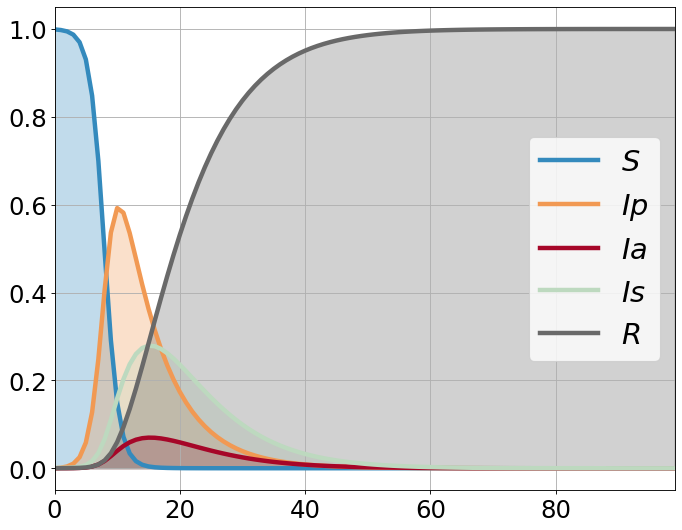

In [20]:
# plot the data and obtain the epidemic curve
S  = data['X'][:,0].flatten()
Ip = data['X'][:,1].flatten()
Ia = data['X'][:,2].flatten()
Is = data['X'][:,3].flatten()
t = data['t']

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.fill_between(t, 0, S/N, color="#348ABD", alpha=0.3)
plt.plot(t, S/N, '-', color="#348ABD", label='$S$', lw=4)

plt.fill_between(t, 0, Ip/N, color='#F19953', alpha=0.3)
plt.plot(t, Ip/N, '-', color='#F19953', label='$Ip$', lw=4)

plt.fill_between(t, 0, Ia/N, color='#A60628', alpha=0.3)
plt.plot(t, Ia/N, '-', color='#A60628', label='$Ia$', lw=4)

plt.fill_between(t, 0, Is/N, color='#BDD9BF', alpha=0.3)
plt.plot(t, Is/N, '-', color='#BDD9BF', label='$Is$', lw=4)

R=N-S-Ia-Ip-Is; plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
plt.plot(t, R/N, '-', color="dimgrey", label='$R$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)